<a href="https://colab.research.google.com/github/Kofi-Young/gitskills/blob/master/paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install quandl
!pip install pyfolio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import quandl
import pyfolio as pf

#Split
from sklearn.model_selection import train_test_split,TimeSeriesSplit,GridSearchCV
#Feature selection / dimension reduction
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFECV,SelectPercentile,f_regression
#Performance evaluation
from sklearn import metrics

# Classifiers
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression,PassiveAggressiveClassifier
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

import warnings
warnings.filterwarnings('ignore')

quandl.ApiConfig.api_key = "WLMxat9y7vVtegz9ZEe5"
start = '2000-01-01'
end = '2020-04-30'

np.random.seed(seed=1)

     |████████████████████████████████| 92kB 5.5MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
  Created wheel for pyfolio: filename=pyfolio-0.9.2-cp36-none-any.whl size=88668 sha256=cec967075b9547eac53f62437973f37b0389ced5112f20d67c008cc5b7cfcd1e
  Stored in directory: /root/.cache/pip/wheels/0d/a8/7d/ac33fe6bf6f3db370291c9de303460d00b8f97cc40a1d80f72
  Created wheel for empyrical: filename=empyrical-0.5.3-cp36-none-any.whl size=37087 sha256=a0345c1e0d1225be78c6f30bcf678001ff136becdbbe4e3e209d65b01d1a3112
  Stored in directory: /root/.cache/pip/wheels/10/a4/3b/951bd609878a82fd72b9ea23699daf1eaada4ff6f583152876
Successfully built pyfolio empyrical


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/pyfolio/pos.py:28: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  ' to position notionals.'


In [0]:
from sklearn.feature_selection import RFECV,SelectPercentile,f_regression

In [0]:
#Daily data from Quandl
quandl_dict= {
    #futures
    'gold' :"CHRIS/CME_GC1.4", #Gold Futures, Continuous Contract #1 (GC1) (Front Month)
    'eurodollar': "CHRIS/CME_ED1.4", #Eurodollar Futures, Continuous Contract #1 (ED1) (Front Month)
    'silver': "CHRIS/CME_SI1.4", #Silver Futures, Continuous Contract #1 (SI1) (Front Month)
    'DCOILWTICO': "FRED/DCOILWTICO.4", #Crude Oil Prices: West Texas Intermediate (WTI) - Cushing, Oklahoma
    #major currency pair spot rates
    'USDCAD': "FED/RXI_N_B_CA", #CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$, Business day
    'EURUSD': "FED/RXI_US_N_B_EU", #SPOT EXCHANGE RATE - EURO AREA, Business day
    'GBPUSD': "FED/RXI_US_N_B_UK", #UNITED KINGDOM -- SPOT EXCHANGE RATE, US$/POUND (1/RXI_N.B.UK), Business day
    'USDJPY': "FED/RXI_N_B_JA", #JAPAN -- SPOT EXCHANGE RATE, YEN/US$, Business day
    'AUDUSD': "FED/RXI_US_N_B_AL", #AUSTRALIA -- SPOT EXCHANGE RATE US$/AU$ (RECIPROCAL OF RXI_N.B.AL), Business day
    'NZDUSD': "FED/RXI_US_N_B_NZ", #NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ RECIPROCAL OF RXI_N.B.NZ, Business day
    'USDCHF': "FED/RXI_N_B_SZ", #SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$, Business day
    'USDNOK': "FED/RXI_N_B_NO", #NORWAY -- SPOT EXCHANGE RATE, KRONER/US$, Business day
    'USDCNY': "FED/RXI_N_B_CH", #CHINA -- SPOT EXCHANGE RATE, YUAN/US$ P.R., Business day
    'USDINR': "FED/RXI_N_B_IN", #INDIA -- SPOT EXCHANGE RATE, RUPEES/US$, Business day
    'DTWEXM': "FRED/DTWEXM", #Trade Weighted U.S. Dollar Index: Major Currencies
    'DTWEXB': "FRED/DTWEXB", #Trade Weighted U.S. Dollar Index: Broad
    #Interest rates
    'DFF': "FRED/DFF", #Effective Federal Funds Rate
    'DTB3': "FRED/DTB3", #3-Month Treasury Bill: Secondary Market Rate
    'DGS5': "FRED/DGS5", #5-Year Treasury Constant Maturity Rate
    'DGS10': "FRED/DGS10",#10-Year Treasury Constant Maturity Rate
    'DGS30': "FRED/DGS30", #30-Year Treasury Constant Maturity Rate
    'T5YIE': "FRED/T5YIE", #5-year Breakeven Inflation Rate
    'T10YIE': "FRED/T10YIE", #10-year Breakeven Inflation Rate
    'T5YIFR': "FRED/T5YIFR",#5-Year, 5-Year Forward Inflation Expectation Rate 
    'TEDRATE': "FRED/TEDRATE", #TED Spread
    'DPRIME': "FRED/DPRIME" #Bank Prime Loan Rate
}

In [0]:
#Local files (Source: yahoo finance)
local_files = {
    'VIX':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/VIX.csv", #Vix index
    #Sector ETFs:
    'XLE':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLE.csv", #Energy Select Sector SPDR Fund 
    'XLF':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLF.csv", #Financial Select Sector SPDR Fund
    'XLU':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLU.csv", #Utilities Select Sector SPDR Fund
    'XLI':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLI.csv", #Industrial Select Sector SPDR Fund
    'XLK':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLK.csv", #Technology Select Sector SPDR Fund
    'XLV':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLV.csv", #Health Care Select Sector SPDR Fund
    'XLY':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLY.csv", #Consumer Discretionary Select Sector SPDR Fund
    'XLP':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLP.csv", #Consumer Staples Select Sector SPDR Fund
    'XLB':"https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/XLB.csv", #Materials Select Sector SPDR Fund
}

In [0]:
#econ features that are not daily (weekly, monthly & quarterly data - need to ffill)
sparse_econ_data= {
    #Growth
    'GDP' :"FRED/GDPPOT", #Gross Domestic Product
    'GDPC1': "FRED/GDPC1", #Real Gross Domestic Product
    'GDPPOT': "FRED/GDPC1", #Real Potential Gross Domestic Product
    #Prices and Inflation
    'CPIAUCSL': "FRED/CPIAUCSL", #Consumer Price Index for All Urban Consumers: All Items
    'CPILFESL': "FRED/CPILFESL", #Consumer Price Index for All Urban Consumers: All Items Less Food & Energy
    'GDPDEF': "FRED/GDPDEF", #Gross Domestic Product: Implicit Price Deflator
    #Money Supply
    'BASE': "FRED/BASE", #St. Louis Adjusted Monetary Base
    'M1': "FRED/M1", #M1 Money Stock
    'M2': "FRED/M2", #M2 Money Stock
    'M1V': "FRED/M1V", #Velocity of M1 Money Stock
    'M2V': "FRED/M2V", #Velocity of M2 Money Stock
    #Employment
    'UNRATE': "FRED/UNRATE", #Civilian Unemployment Rate
    'NROU': "FRED/NROU", #Natural Rate of Unemployment (Long-Term)
    'NROUST': "FRED/NROUST", #Natural Rate of Unemployment (Short-Term)
    'CIVPART': "FRED/CIVPART", #Civilian Labor Force Participation Rate
    'EMRATIO': "FRED/EMRATIO", #Civilian Employment-Population Ratio
    'UNEMPLOY': "FRED/UNEMPLOY", #Unemployed level
    'PAYEMS': "FRED/PAYEMS", #All Employees: Total nonfarm
    'MANEMP': "FRED/MANEMP", #All Employees: Manufacturing
    'ICSA': "FRED/ICSA", #Initial Claims
    #Income and Expenditure
    'MEHOINUSA672N': "FRED/MEHOINUSA672N", #Real Median Household Income in the United States
    'DSPIC96': "FRED/DSPIC96", #Real Disposable Personal Income
    'PCE': "FRED/PCE", #Personal Consumption Expenditures
    'PCEDG': "FRED/PCEDG", #Personal Consumption Expenditures: Durable Goods
    'PSAVERT': "FRED/PSAVERT", #Personal Saving Rate
    'RRSFS': "FRED/RRSFS", #Real Retail and Food Services Sales
    'DSPI': "FRED/DSPI", #Disposable personal income
    #Debt
    'GFDEBTN': "FRED/GFDEBTN", #Federal Debt: Total Public Debt
    'GFDEGDQ188S': "FRED/GFDEGDQ188S", #Federal Debt: Total Public Debt as Percent of Gross Domestic Product
    'EXCSRESNW': "FRED/EXCSRESNW", #Excess Reserves of Depository Institutions
    'TOTCI': "FRED/TOTCI", #Commercial and Industrial Loans, All Commercial Banks
    #Other Economic Indicators
    'INDPRO': "FRED/INDPRO", #Industrial Production Index
    'TCU': "FRED/TCU", #Capacity Utilization: Total Industry
    'HOUST': "FRED/HOUST", #Housing Starts: Total: New Privately Owned Housing Units Started
    'GPDI': "FRED/GPDI", #Gross Private Domestic Investment
    'CP': "FRED/CP", #Corporate Profits After Tax (without IVA and CCAdj)
    'STLFSI': "FRED/STLFSI", #St. Louis Fed Financial Stress Index
    'USSLIND': "FRED/USSLIND", #Leading Index for the United States
    'S&P 500 Dividend Yield by Month': "MULTPL/SP500_DIV_MONTH",#12-month real dividend per share inflation adjusted February, 2020 dollars. Data courtesy Standard & Poor's and Robert Shiller.
    'S&P 500 Earnings by Month':"MULTPL/SP500_EARNINGS_MONTH",#S&P 500 Earnings Per Share. 12-month real earnings per share inflation adjusted, constant February, 2020 dollars. Sources: Standard & Poor's for current S&P 500 Earnings. Robert Shiller and his book Irrational Exuberance for historic S&P 500 Earnings.
    'S&P 500 Earnings Yield by Month':"MULTPL/SP500_EARNINGS_YIELD_MONTH",#S&P 500 Earnings Yield. Earnings Yield = trailing 12 month earnings divided by index price (or inverse PE) Yields following September, 2019 (including current yield) are estimated based on 12 month earnings through September, 2019 the latest reported by S&P. Source: Standard & Poor's
    'S&P 500 PE Ratio by Month':"MULTPL/SP500_PE_RATIO_MONTH",#Price to earnings ratio, based on trailing twelve month as reported earnings. Current PE is estimated from latest reported earnings and current market price. Source: Robert Shiller and his book Irrational Exuberance for historic S&P 500 PE Ratio.
}

In [0]:
# Import SPY
url = "https://raw.githubusercontent.com/YizhouTang/SP500_Classfication_Models/master/data/SPY.csv"

#df = pd.read_csv('SPY.csv',index_col = 'Date',parse_dates = True)
df = pd.read_csv(url,index_col = 'Date',parse_dates = True)

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1993-01-29,43.96875,43.96875,43.75000,43.93750,26.299288,1003200
1993-02-01,43.96875,44.25000,43.96875,44.25000,26.486324,480500
1993-02-02,44.21875,44.37500,44.12500,44.34375,26.542448,201300
1993-02-03,44.40625,44.84375,44.37500,44.81250,26.822998,529400
1993-02-04,44.96875,45.09375,44.46875,45.00000,26.935240,531500


In [0]:
#Function to get data from Quandl.
def get_quandl_data(df,quandl_dict,start,end):
    data = quandl.get(list(quandl_dict.values()), start_date=start, end_date=end)
    data.columns = list(quandl_dict.keys())
    df = pd.concat([df, data.reindex(df.index)], axis=1)
    return df

#Function to get data from Quandl.
def get_local_data(df,local_files,start,end):
    for i in local_files:
        url = local_files[i]
        df_temp = pd.read_csv(url,index_col='Date',parse_dates = True)
        df_temp = df_temp['Adj Close'].to_frame()
        df_temp.columns = [i]
        df = pd.concat([df, df_temp.reindex(df.index)], axis=1)

    mask = (df.index>=pd.to_datetime(start)) & (df.index <=pd.to_datetime(end))
    df = df.loc[mask]
    return df

#Function to get sparse econ data (frequence != daily) from Quandl.
#Also compute the change in economic data.
#All econ data are preproccessed using ffill.
def get_sparse_econ_data(df,econ_dict,start,end):
    #Get raw econ data
    data = quandl.get(list(econ_dict.values()), start_date=start, end_date=end)
    data.columns = list(econ_dict.keys())
    #Get econ data, transformed using percentage return
    ret_data = quandl.get(list(econ_dict.values()), start_date=start, end_date=end,transform = "rdiff")
    ret_data.columns = [col + '_ret' for col in list(econ_dict.keys())]

    data = data.ffill()
    data = data.reindex(df.index)
    data = data.ffill()

    ret_data = ret_data.ffill()
    ret_data = ret_data.reindex(df.index)
    ret_data = ret_data.ffill()

    df = pd.concat([df,data ,ret_data], axis=1)

    return df

In [0]:
#Function to compute additional derived features
#It iterates through each existing feature and compute key statistics (rolling) for multiple lookback periods.
def derive_features(df):
    features = df.columns
    #Iterate through each column in df
    for col in features:
        if col != 'y':
            #Daily change
            df[col+'_ret'] = df[col].pct_change()
            df[col+'_diff'] = df[col].diff()
            #Lookback periods
            lookback = [5,21, 63, 126, 252]#1 week, 1 month, 1 quarter, half year, 1 year
            
            #Compute key statistics for each lookback period
            for i in lookback:
                df[col+'_ret_' + str(i)] = df[col]/df[col].shift(i)-1
                #Return-based
                df[col+'_rolling_mean_' + str(i)] = df[col+'_ret'].rolling(i).mean()
                df[col+'_rolling_median_' + str(i)] = df[col+'_ret'].rolling(i).median()
                df[col+'_rolling_stdev_' + str(i)] = df[col+'_ret'].rolling(i).std()
                df[col+ '_rolling_skew_' + str(i)] = df[col+'_ret'].rolling(i).skew()
                df[col+ '_rolling_kurt_' + str(i)] = df[col+'_ret'].rolling(i).kurt()
                df[col+ '_rolling_min_' + str(i)] = df[col+'_ret'].rolling(i).min()
                df[col+ '_rolling_max_' + str(i)] = df[col+'_ret'].rolling(i).max()
                df[col+ '_rolling_corr_' + str(i)] = df[col+'_ret'].rolling(i).corr()
                df[col+ '_ewma_' + str(i)] = pd.DataFrame.ewm(df[col], span= i).mean()
                #Relative level
                df[col+'_rel_lvl_mean_' + str(i)] = df[col]/df[col].rolling(i).mean()
                df[col+'_rel_lvl_min_' + str(i)] = df[col]/df[col].rolling(i).min()
                df[col+'_rel_lvl_max_' + str(i)] = df[col]/df[col].rolling(i).max()                        
    return df

In [0]:
df = get_quandl_data(df,quandl_dict,start,end)
df = get_local_data(df,local_files,start,end)

# Compute additional derived features.
df = derive_features(df)  

# Import economic data from Quandl.
# I did not call the derive_features function for the economic data due to the low frequency nature of the data.
df = get_sparse_econ_data(df,sparse_econ_data,start,end)

In [62]:
df.shape

(5109, 2940)

In [13]:
df = df.tz_localize(tz='US/Eastern')

#rmissingvaluecol is a helper function that removes columns that have nans more than the threshold percentage
def rmissingvaluecol(df,threshold):
    l = []
    l = list(df.drop(df.loc[:,list((100*(df.isnull().sum()/len(df.index))>=threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values:"%threshold,(df.shape[1] - len(l)))
    return l

df = df.replace([np.inf, -np.inf], np.nan)

cols = rmissingvaluecol(df,1) #Here threshold is 1% which means we are going to drop columns having more than 1% of missing values

df_dropped_na= df[cols]

df_dropped_na = df_dropped_na.dropna()

# Columns having more than 1 percent missing values: 1901


In [0]:
y_pre = df_dropped_na['Adj Close']
X_pre = df_dropped_na
X_pre = X_pre.drop(['Adj Close'], axis = 1)




In [64]:
df_dropped_na

,Open,High,Low,Close,Adj Close,Volume,eurodollar,USDCAD,EURUSD,GBPUSD,USDJPY,AUDUSD,NZDUSD,USDCHF,USDNOK,USDCNY,USDINR,DFF,DTB3,DGS5,DGS10,DPRIME,VIX,XLE,XLF,XLU,XLI,XLK,XLV,XLY,XLP,XLB,Open_ret,Open_diff,Open_ret_5,Open_rolling_mean_5,Open_rolling_median_5,Open_rolling_stdev_5,Open_rolling_skew_5,Open_rolling_kurt_5,...,INDPRO,TCU,HOUST,GPDI,CP,STLFSI,USSLIND,S&P 500 Dividend Yield by Month,S&P 500 Earnings by Month,S&P 500 Earnings Yield by Month,S&P 500 PE Ratio by Month,CPIAUCSL_ret,CPILFESL_ret,BASE_ret,M1_ret,M2_ret,UNRATE_ret,CIVPART_ret,EMRATIO_ret,UNEMPLOY_ret,PAYEMS_ret,MANEMP_ret,ICSA_ret,DSPIC96_ret,PCE_ret,PCEDG_ret,PSAVERT_ret,RRSFS_ret,DSPI_ret,EXCSRESNW_ret,TOTCI_ret,INDPRO_ret,TCU_ret,HOUST_ret,STLFSI_ret,USSLIND_ret,S&P 500 Dividend Yield by Month_ret,S&P 500 Earnings by Month_ret,S&P 500 Earnings Yield by Month_ret,S&P 500 PE Ratio by Month_ret
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-02-29 00:00:00-05:00,136.062500,137.437500,135.750000,137.437500,93.927124,8242500,93.790,1.4505,0.9643,1.5780,109.88,0.6155,0.4865,1.6665,8.3810,8.2786,43.65,5.85,5.62,6.61,6.42,8.75,23.370001,16.627710,8.553971,11.728915,17.643505,43.604252,20.905130,19.963211,12.833570,13.158419,0.020150,2.687500,0.006472,0.001368,0.003236,0.013863,0.281105,-1.329958,...,94.4557,82.0127,1737.0,1950.650,527.619,0.999,1.48,25.44,76.04,3.60,27.76,0.004135,0.000558,-0.003522,-0.004158,-0.000064,0.025000,0.000000,0.000,0.026279,0.000908,0.000058,-0.010601,0.003814,0.012914,0.024323,-0.111111,0.010655,0.007057,0.000000,-0.004002,0.002972,-0.000474,0.061736,0.002006,-0.080745,-0.004695,0.012921,0.046512,-0.044077
2000-03-01 00:00:00-05:00,137.625000,139.000000,137.218750,138.437500,94.610588,6868000,93.820,1.4470,0.9700,1.5849,107.10,0.6067,0.4853,1.6568,8.3115,8.2786,43.63,5.78,5.60,6.59,6.39,8.75,21.639999,17.044899,8.670787,12.242153,17.546921,44.043217,21.079245,19.732500,12.716279,13.021259,0.011484,1.562500,0.014747,0.003017,0.007834,0.014611,-0.189971,-2.434185,...,94.7980,82.0292,1604.0,1950.650,527.619,0.999,1.88,25.44,76.04,3.53,28.31,0.005882,0.003344,-0.003522,-0.004158,-0.000064,-0.024390,0.000000,0.000,-0.021338,0.003600,0.000984,-0.010601,0.002558,0.009985,-0.007951,-0.062500,0.005743,0.006829,-0.210751,0.002181,0.003624,0.000201,-0.076569,0.002006,0.270270,-0.004695,0.012921,-0.019444,0.019813
2000-03-02 00:00:00-05:00,138.687500,139.125000,137.343750,138.531250,94.674644,7600200,93.825,1.4543,0.9619,1.5765,107.37,0.6077,0.4878,1.6714,8.4024,8.2787,43.65,5.76,5.60,6.59,6.40,8.75,21.059999,17.362745,8.618867,12.559147,17.611317,44.482182,20.986382,19.708204,12.745600,12.737118,0.007720,1.062500,0.014632,0.002995,0.007720,0.014602,-0.183573,-2.424854,...,94.7980,82.0292,1604.0,1950.650,527.619,0.999,1.88,25.44,76.04,3.53,28.31,0.005882,0.003344,-0.003522,-0.004158,-0.000064,-0.024390,0.000000,0.000,-0.021338,0.003600,0.000984,-0.010601,0.002558,0.009985,-0.007951,-0.062500,0.005743,0.006829,-0.210751,0.002181,0.003624,0.000201,-0.076569,0.002006,0.270270,-0.004695,0.012921,-0.019444,0.019813
2000-03-03 00:00:00-05:00,140.437500,141.718750,139.718750,141.125000,96.447258,12770300,93.837,1.4510,0.9618,1.5810,107.80,0.6082,0.4878,1.6712,8.3970,8.2789,43.65,5.72,5.63,6.60,6.39,8.75,19.209999,17.084627,8.696748,12.672366,18.094252,45.713749,21.276573,20.072508,12.677183,13.148625,0.012618,1.750000,0.038835,0.007713,0.011484,0.012639,-1.511643,2.955307,...,94.7980,82.0292,1604.0,1950.650,527.619,0.963,1.88,25.44,76.04,3.53,28.31,0.005882,0.003344,-0.003522,-0.004158,-0.000064,-0.024390,0.000000,0.000,-0.021338,0.003600,0.000984,-0.010601,0.002558,0.009985,-0.007951,-0.062500,0.005743,0.006829,-0.210751,0.002181,0.003624,0.000201,-0.076569,-0.036036,0.270270,-0.004695,0.012921,-0.019444,0.019813
2000-03-06 00:00:00-05:00,140.812500,141.343750,138.750000,139.750000,95.507530,11967100,93.837,1.4555,0.9603,1.5732,107.74,0.6016,0.4810,1.6750,8.4125,8.2785,43.63,5.73,5.66,6.64,6.42,8.75,21.500000,

In [0]:
cv_size=0.2
test_size=0.2

In [16]:
num_cv = int(cv_size*len(df))
num_test = int(test_size*len(df))
num_train = len(df_dropped_na) - num_cv - num_test
print("num_train = " + str(num_train))
print("num_cv = " + str(num_cv))
print("num_test = " + str(num_test))

num_train = 2938
num_cv = 1021
num_test = 1021


In [0]:
scaler = StandardScaler()
#Fit scaler using the training data
scaler.fit(X_pre[:num_train])
X_scaled = scaler.transform(X_pre)
#scaler_final = StandardScaler()
#train_cv_scaled_final = scaler_final.fit_transform(np.array(train_cv['adj_close']).reshape(-1,1))
#print("scaler_final.mean_ = " + str(scaler_final.mean_))
#print("scaler_final.var_ = " + str(scaler_final.var_))

In [38]:
X_scaled

array([[ 0.92791856,  0.95940796,  0.96106241, ...,  0.0444197 ,
         0.3150955 , -0.44496361],
       [ 1.01314049,  1.04494926,  1.04103635, ...,  0.0444197 ,
        -0.26226271,  0.20435286],
       [ 1.0710914 ,  1.05179256,  1.04784265, ...,  0.0444197 ,
        -0.26226271,  0.20435286],
       ...,
       [ 8.92091648,  9.1359247 ,  8.88903283, ...,  0.07844553,
        -0.24532682,  0.18587822],
       [ 8.60021074,  8.65689343,  8.38101019, ...,  0.07844553,
        -0.24532682,  0.18587822],
       [ 8.68856857,  8.81894237,  8.64727319, ...,  0.07844553,
        -0.24532682,  0.18587822]])

In [0]:
#Initialize and fit selector
MI_selector = SelectPercentile(f_regression, percentile=60)#Remove the lower 40%
MI_selector.fit(X_scaled,  y_pre)

#Transform
X_MI = MI_selector.transform(X_scaled)

In [19]:
X_MI.shape

(4980, 623)

In [0]:
# 2. Dimension Reduction: PCA
pca = PCA(0.99).fit(X_MI)
X_PCA = pca.transform(X_MI)

In [21]:
pca.n_components_

1

In [0]:
y_pred = y_pre[:, np.newaxis]
dataset = np.concatenate((X_PCA, y_pred),axis=1) 

In [70]:
dataset

array([[-1.06518913e+13,  9.39271240e+01],
       [-1.06518913e+13,  9.46105880e+01],
       [-1.06518913e+13,  9.46746440e+01],
       ...,
       [ 9.19881268e+14,  2.81589996e+02],
       [ 9.19881268e+14,  2.73040009e+02],
       [ 9.19881268e+14,  2.79100006e+02]])

In [0]:

data_mean = dataset[:num_train].mean(axis=0)
data_std = dataset[:num_train].std(axis=0)
dataset = (dataset-data_mean)/data_std

In [52]:
data_mean

array([-1.06518913e+13,  8.96909003e+01])

In [51]:
dataset

array([[-5.63435134e-01,  2.83178925e-01],
       [-6.93005583e-01,  3.28866456e-01],
       [-6.49815433e-01,  3.33148408e-01],
       ...,
       [ 9.35327800e+14,  1.28278823e+01],
       [ 9.35327800e+14,  1.22563412e+01],
       [ 9.35327800e+14,  1.26614339e+01]])

In [0]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [0]:
past_history = 90
future_target = 0
STEP = 1

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   num_train, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               num_train, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

In [72]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (90, 2)


In [0]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000

train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [0]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

In [75]:
EPOCHS = 10
EVALUATION_INTERVAL = 200
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/30
200/200 [==============================] - 16s 79ms/step - loss: 88.8560 - val_loss: 203.5869
Epoch 2/30
200/200 [==============================] - 15s 76ms/step - loss: 87.2486 - val_loss: 202.0163
Epoch 3/30
 78/200 [==========>...................] - ETA: 8s - loss: 86.1073

KeyboardInterrupt: ignored

In [0]:
pred = single_step_model.predict(x_val_single)

In [66]:
x_val_single.shape

(2012, 30, 2)

In [0]:
df1 = df_dropped_na[-2012:]

Text(0, 0.5, 'USD')

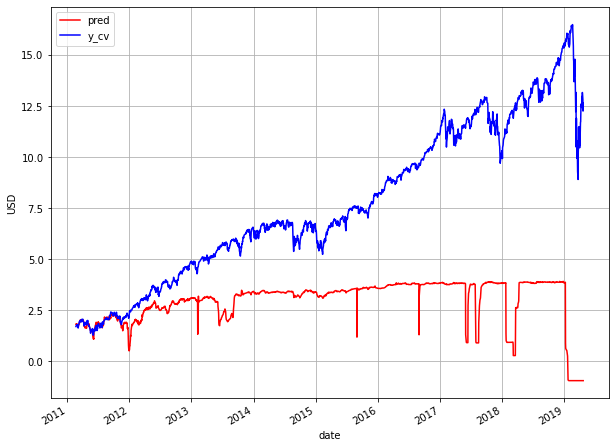

In [68]:
from pylab import rcParams
# Plot adjusted close over time
rcParams['figure.figsize'] = 10, 8 # width 10, height 8

est_df = pd.DataFrame({'pred': pred.reshape(-1), 
                       'y_cv': y_val_single.reshape(-1),
                       'date': df1.index})
ax = est_df.plot(x='date', y='pred', style='r-', grid=True)
ax = est_df.plot(x='date', y='y_cv', style='b', grid=True, ax=ax)
ax.set_xlabel("date")
ax.set_ylabel("USD")